In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv("vehicle-1.csv")
df.shape

(846, 19)

- There are 864 rows with 19 columns

In [5]:
df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
436           93         42.0                  64.0         123.0   
256           91         36.0                  77.0         157.0   
809           79         38.0                  55.0         120.0   
265           80         45.0                  71.0         128.0   
185          100         41.0                  75.0         205.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
436                  51.0                        7          135.0   
256                  56.0                        7          155.0   
809                  55.0                        5          142.0   
265                  56.0                        7          151.0   
185                  71.0                        5          176.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
436           51.0                    18.0                        144   
256           42.0                    19.0                        126   
809           48.0                    19.0                        128   
265           45.0                    19.0                        147   
185           36.0                    21.0                        138   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
436            164.0              262.0                      155.0   
256            177.0              361.0                      123.0   
809            153.0              295.0                      145.0   
265            171.0              337.0                      176.0   
185            204.0              479.0                      151.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
436                         78.0            16.0              12.0   
256                         65.0             8.0              15.0   
809                         81.0             4.0               2.0   
265                         79.0             3.0              16.0   
185                         72.0             7.0              19.0   

     skewness_about.2  hollows_ratio class  
436             185.0            185   van  
256             195.0            201   car  
809             180.0            183   car  
265             181.0            187   bus  
185             197.0            197   bus

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- There are some missing values.
- Datatypes : 4 integer type, 1 object type which is our target variable rest all are float type.

In [72]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [73]:
df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

- We have 3 categories in our target variable

In [71]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- Maximum nulls present in any column are 6
- We will try to impute them, because dropping them is not healthy for our model as we will lose some information.

In [77]:
#filling all null values with median
df.fillna(df.median(),axis=0,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

- Now there are no missing values.

Text(0.5, 1.0, 'Box Plot')

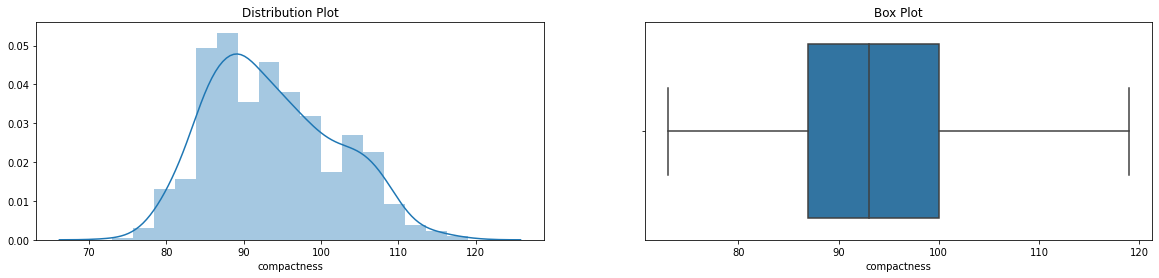

In [79]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in compactness column and it looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

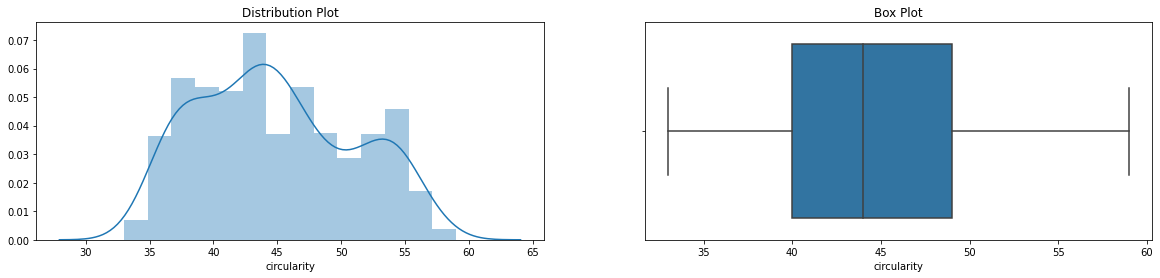

In [80]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in circularity column, it has two peaks and is right skewed.

Text(0.5, 1.0, 'Box Plot')

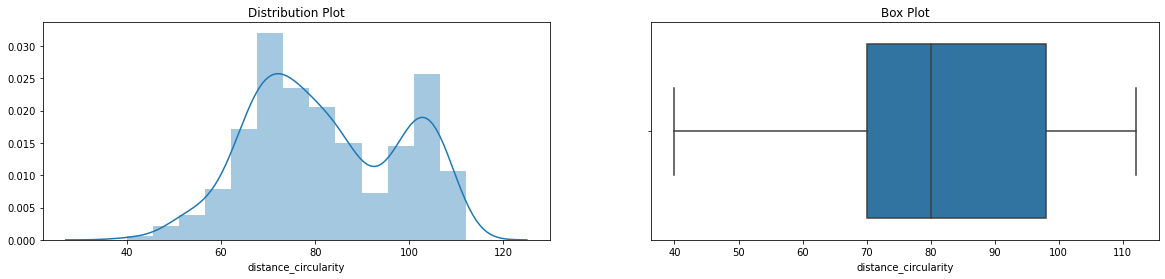

In [82]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in distance_circularity column, it has two peaks and is right skewed.

Text(0.5, 1.0, 'Box Plot')

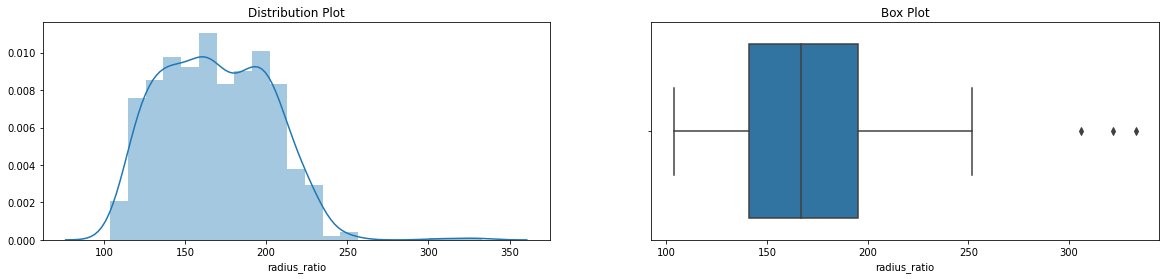

In [83]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in radius_ratio column and there is right skewness.

In [14]:
q1 = np.quantile(df['radius_ratio'],0.25)
q3 = np.quantile(df['radius_ratio'],0.75)
IQR = q3-q1
x = df['radius_ratio'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in radius_ratio column are",df[df['radius_ratio']>(df['radius_ratio'].quantile(0.75)+(1.5 * IQR))]['radius_ratio'].shape[0])
outliers = [y for stat in boxplot_stats(df['radius_ratio']) for y in stat['fliers']]
outliers

The Outliers in radius_ratio column are 3


[306.0, 322.0, 333.0]

Text(0.5, 1.0, 'Box Plot')

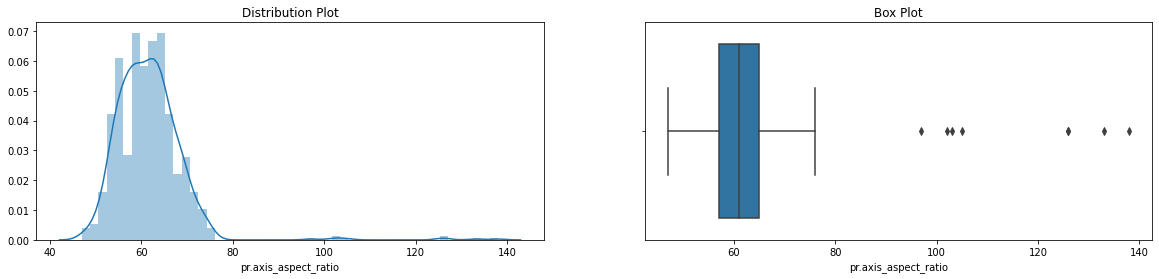

In [84]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness

In [16]:
q1 = np.quantile(df['pr.axis_aspect_ratio'],0.25)
q3 = np.quantile(df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
x = df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in pr.axis_aspect_ratio column are",df[df['pr.axis_aspect_ratio']>(df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR))]['pr.axis_aspect_ratio'].shape[0])
outliers = [y for stat in boxplot_stats(df['pr.axis_aspect_ratio']) for y in stat['fliers']]
outliers

The Outliers in pr.axis_aspect_ratio column are 8


[103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]

Text(0.5, 1.0, 'Box Plot')

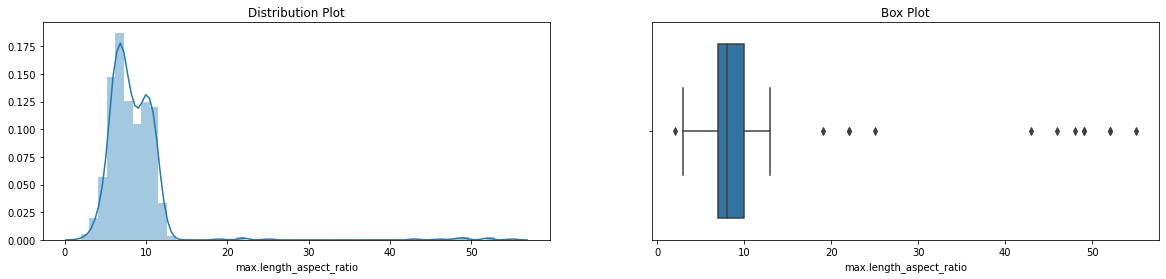

In [85]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in max.length_aspect_ratio column and there is right skewness.

In [18]:
q1 = np.quantile(df['max.length_aspect_ratio'],0.25)
q3 = np.quantile(df['max.length_aspect_ratio'],0.75)
IQR = q3-q1
x = df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in max.length_aspect_ratio column are",df[df['max.length_aspect_ratio']>(df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR))]['max.length_aspect_ratio'].shape[0])
outliers = [y for stat in boxplot_stats(df['max.length_aspect_ratio']) for y in stat['fliers']]
outliers

The Outliers in max.length_aspect_ratio column are 12


[2, 52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 55, 22]

In [19]:
df[df['max.length_aspect_ratio'] == 52]

compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
100           82         45.0                  66.0         252.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
100                 126.0                       52          148.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
100           45.0                    19.0                        144   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
100            237.0              326.0                      185.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
100                        119.0             1.0               1.0   

     skewness_about.2  hollows_ratio class  
4               180.0            183   bus  
100             181.0            185   bus

Text(0.5, 1.0, 'Box Plot')

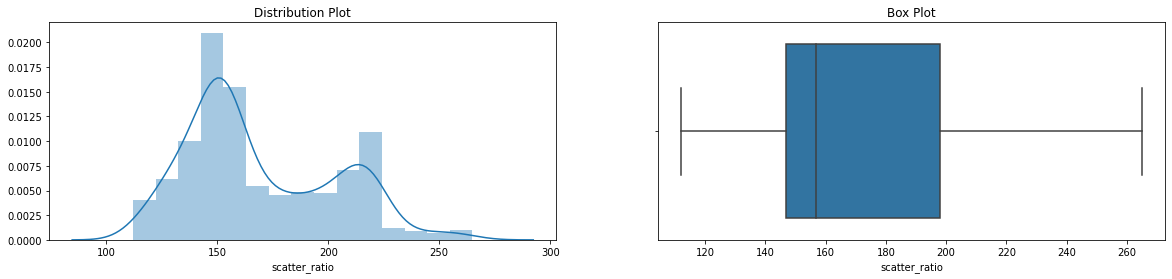

In [86]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness

Text(0.5, 1.0, 'Box Plot')

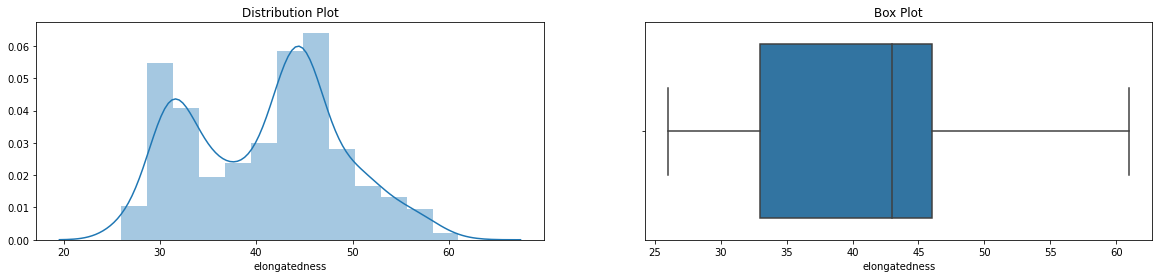

In [87]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness

Text(0.5, 1.0, 'Box Plot')

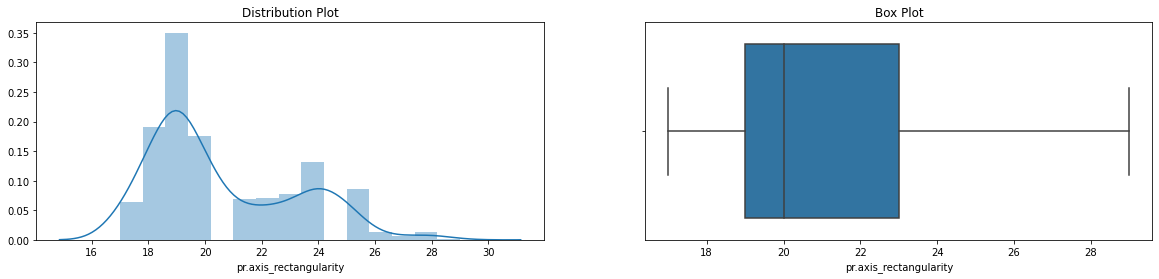

In [88]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness.

Text(0.5, 1.0, 'Box Plot')

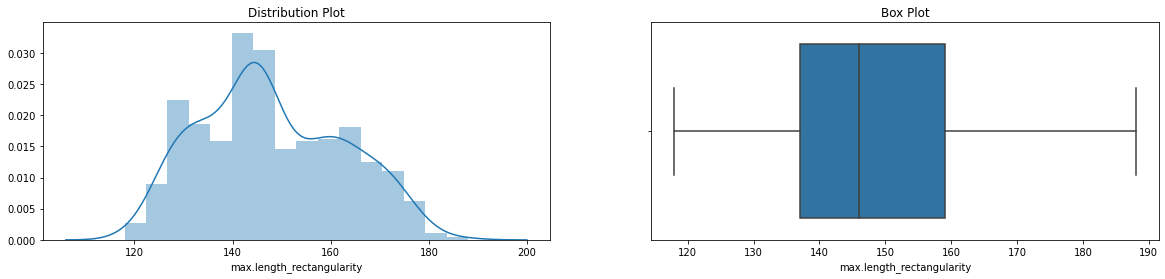

In [89]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness

Text(0.5, 1.0, 'Box Plot')

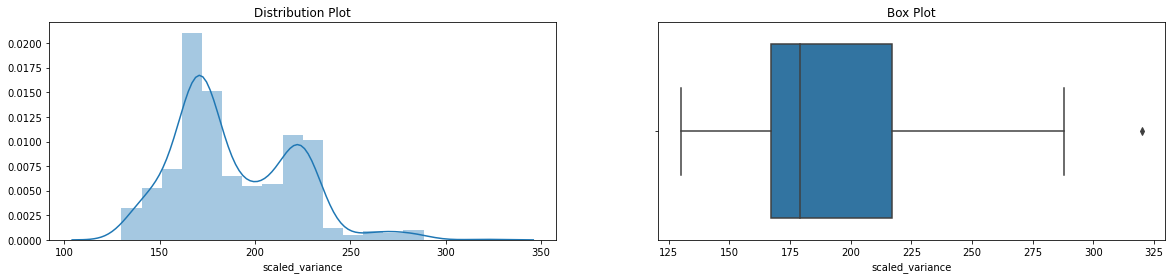

In [90]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there is a outlier in scaled_variance column and there are two peaks in distribution plot and there is right skewness

In [25]:
q1 = np.quantile(df['scaled_variance'],0.25)
q3 = np.quantile(df['scaled_variance'],0.75)
IQR = q3-q1
x = df['scaled_variance'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in scaled_variance column are",df[df['scaled_variance']>(df['scaled_variance'].quantile(0.75)+(1.5 * IQR))]['scaled_variance'].shape[0])
outliers = [y for stat in boxplot_stats(df['scaled_variance']) for y in stat['fliers']]
outliers

The Outliers in scaled_variance column are 1


[320.0]

Text(0.5, 1.0, 'Box Plot')

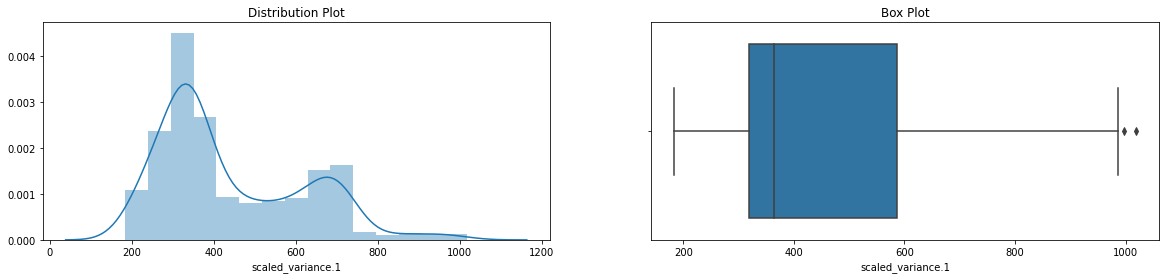

In [91]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are 2 outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness

In [27]:
q1 = np.quantile(df['scaled_variance.1'],0.25)
q3 = np.quantile(df['scaled_variance.1'],0.75)
IQR = q3-q1
x = df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in scaled_variance.1 column are",df[df['scaled_variance.1']>(df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR))]['scaled_variance.1'].shape[0])
outliers = [y for stat in boxplot_stats(df['scaled_variance.1']) for y in stat['fliers']]
outliers

The Outliers in scaled_variance.1 column are 2


[998.0, 1018.0]

Text(0.5, 1.0, 'Box Plot')

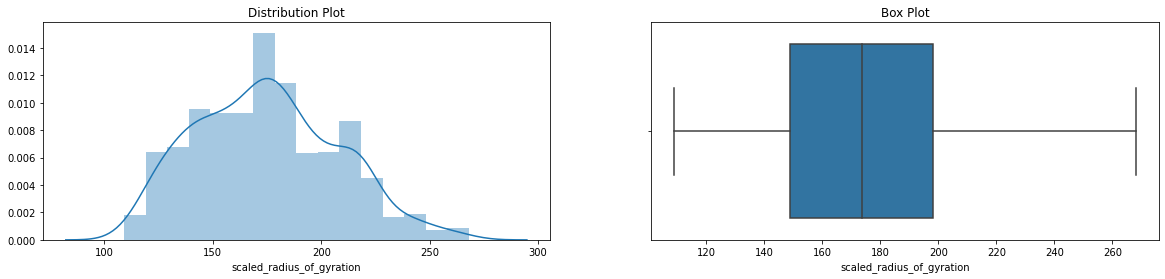

In [92]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in scaled_radius_of_gyration column and it is right skewed.

Text(0.5, 1.0, 'Box Plot')

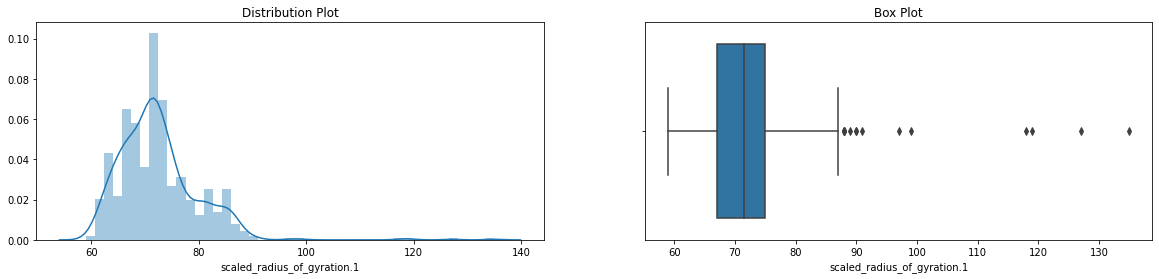

In [93]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness

In [30]:
q1 = np.quantile(df['scaled_radius_of_gyration.1'],0.25)
q3 = np.quantile(df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
x = df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in scaled_radius_of_gyration.1 column are",df[df['scaled_radius_of_gyration.1']>(df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR))]['scaled_radius_of_gyration.1'].shape[0])
outliers = [y for stat in boxplot_stats(df['scaled_radius_of_gyration.1']) for y in stat['fliers']]
outliers

The Outliers in scaled_radius_of_gyration.1 column are 15


[127.0,
 118.0,
 88.0,
 88.0,
 119.0,
 97.0,
 89.0,
 90.0,
 88.0,
 135.0,
 88.0,
 91.0,
 90.0,
 99.0,
 88.0]

Text(0.5, 1.0, 'Box Plot')

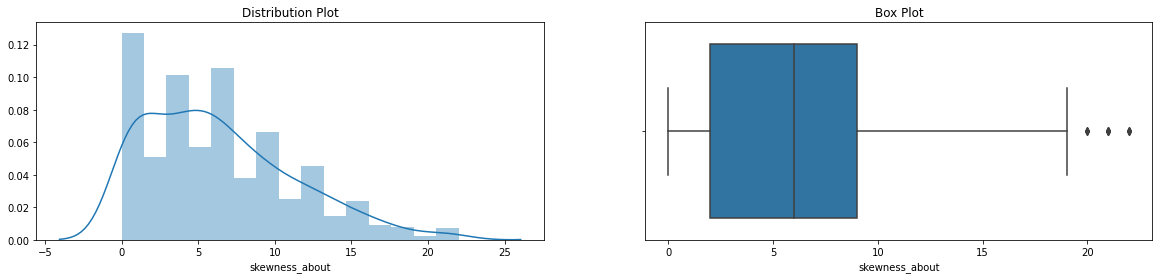

In [94]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in skewness_about column and there is right skewness

In [32]:
q1 = np.quantile(df['skewness_about'],0.25)
q3 = np.quantile(df['skewness_about'],0.75)
IQR = q3-q1
x = df['skewness_about'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in skewness_about column are",df[df['skewness_about']>(df['skewness_about'].quantile(0.75)+(1.5 * IQR))]['skewness_about'].shape[0])
outliers = [y for stat in boxplot_stats(df['skewness_about']) for y in stat['fliers']]
outliers

The Outliers in skewness_about column are 12


[20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]

Text(0.5, 1.0, 'Box Plot')

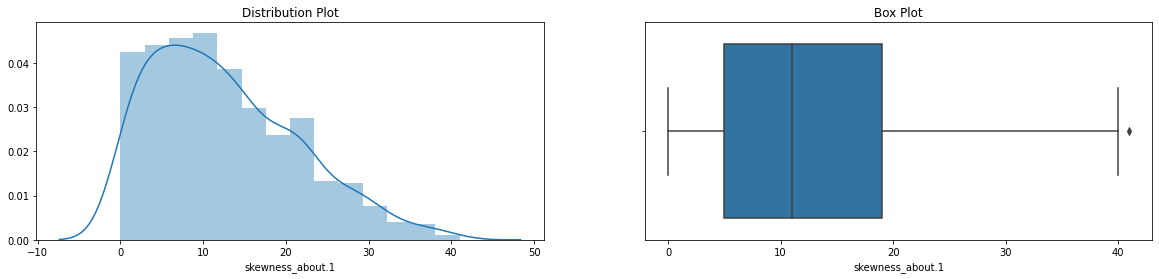

In [95]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are outliers in skewness_about.1 column and there is right skewness

In [96]:
q1 = np.quantile(df['skewness_about.1'],0.25)
q3 = np.quantile(df['skewness_about.1'],0.75)
IQR = q3-q1
x = df['skewness_about.1'].quantile(0.75)+(1.5 * IQR)
print("The Outliers in skewness_about.1 column are",df[df['skewness_about.1']>(df['skewness_about.1'].quantile(0.75)+(1.5 * IQR))]['skewness_about.1'].shape[0])
outliers = [y for stat in boxplot_stats(df['skewness_about.1']) for y in stat['fliers']]
outliers

The Outliers in skewness_about.1 column are 1


[41.0]

Text(0.5, 1.0, 'Box Plot')

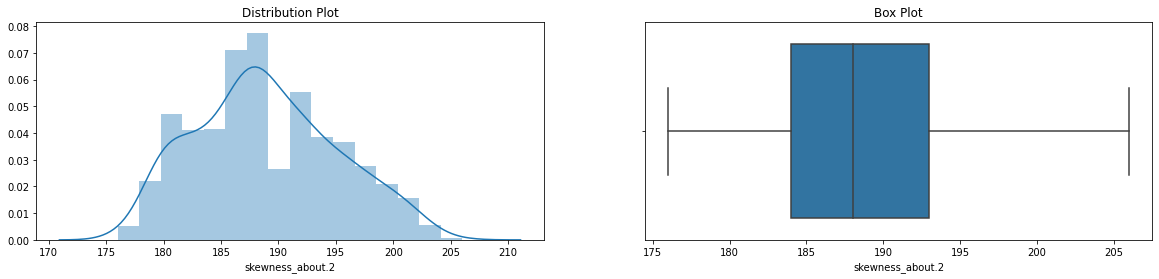

In [97]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in skewness_about.2 column and there is left skewness

Text(0.5, 1.0, 'Box Plot')

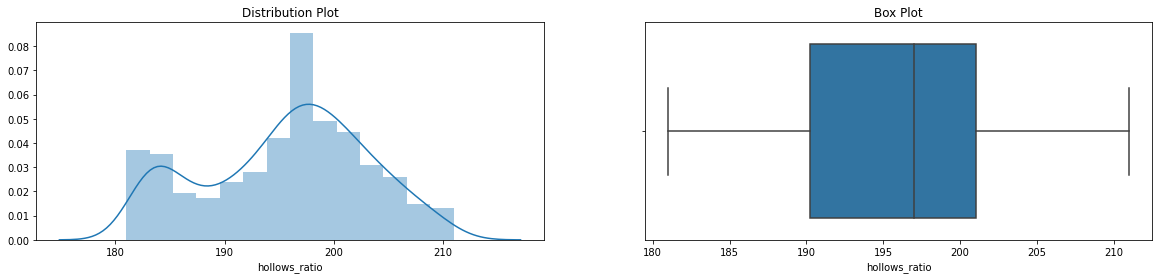

In [98]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in hollows_ratio column and there is left skewness

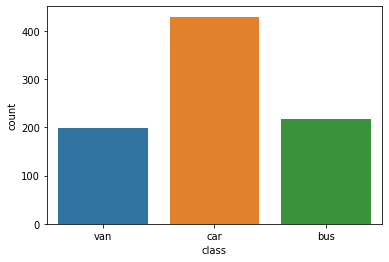

car    429
bus    218
van    199
Name: class, dtype: int64

In [99]:
sns.countplot(df['class'])
plt.show()
df['class'].value_counts()

#### We have maximum number of cars followed by bus followed by van.

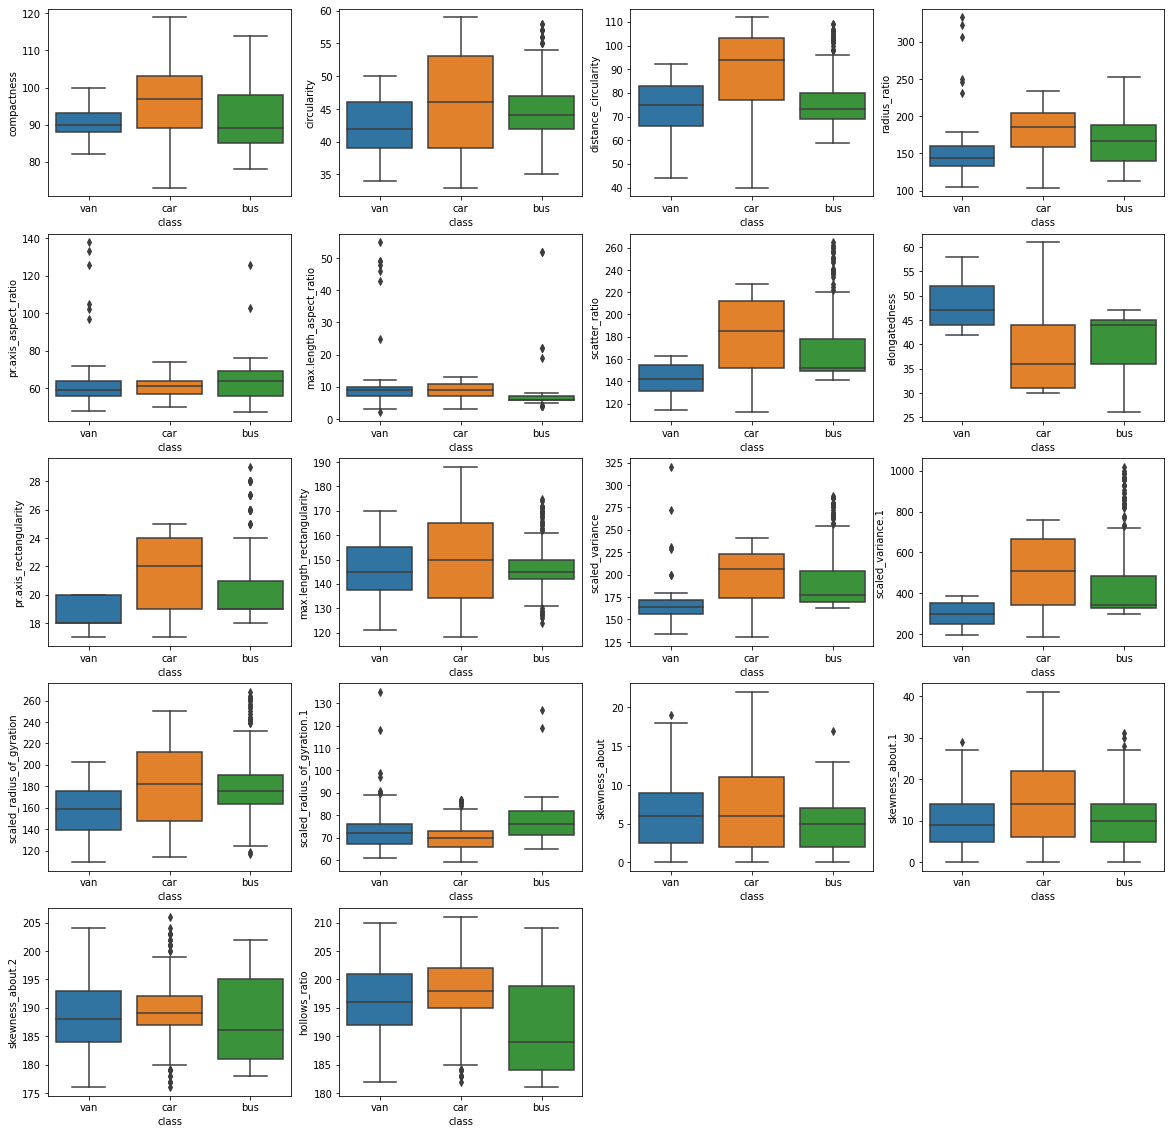

In [100]:
num_features=[col for col in df.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.boxplot(df['class'],df[col]);
plt.show()

#### As there are many outliers, we will try to replace them with mean values as dropping them will effect model performance.

In [39]:
def outliers_transform_with_replace_mean(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset before Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print(cols,"has ",count," outliers")
        
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.mean(x))
            else:
                y.append(p)
        base_dataset[cols]=y
        
    print("\nOutliers in Dataset after Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print(cols,"has ",count," outliers")

In [40]:
outliers_transform_with_replace_mean(df)

Outliers in Dataset before Treatment
compactness has  0  outliers
circularity has  0  outliers
distance_circularity has  0  outliers
radius_ratio has  3  outliers
pr.axis_aspect_ratio has  8  outliers
max.length_aspect_ratio has  13  outliers
scatter_ratio has  0  outliers
elongatedness has  0  outliers
pr.axis_rectangularity has  0  outliers
max.length_rectangularity has  0  outliers
scaled_variance has  1  outliers
scaled_variance.1 has  2  outliers
scaled_radius_of_gyration has  0  outliers
scaled_radius_of_gyration.1 has  15  outliers
skewness_about has  12  outliers
skewness_about.1 has  1  outliers
skewness_about.2 has  0  outliers
hollows_ratio has  0  outliers

Outliers in Dataset after Treatment
compactness has  0  outliers
circularity has  0  outliers
distance_circularity has  0  outliers
radius_ratio has  0  outliers
pr.axis_aspect_ratio has  0  outliers
max.length_aspect_ratio has  0  outliers
scatter_ratio has  0  outliers
elongatedness has  0  outliers
pr.axis_rectangular

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

#### Now there are no outliers and we have all our rows.

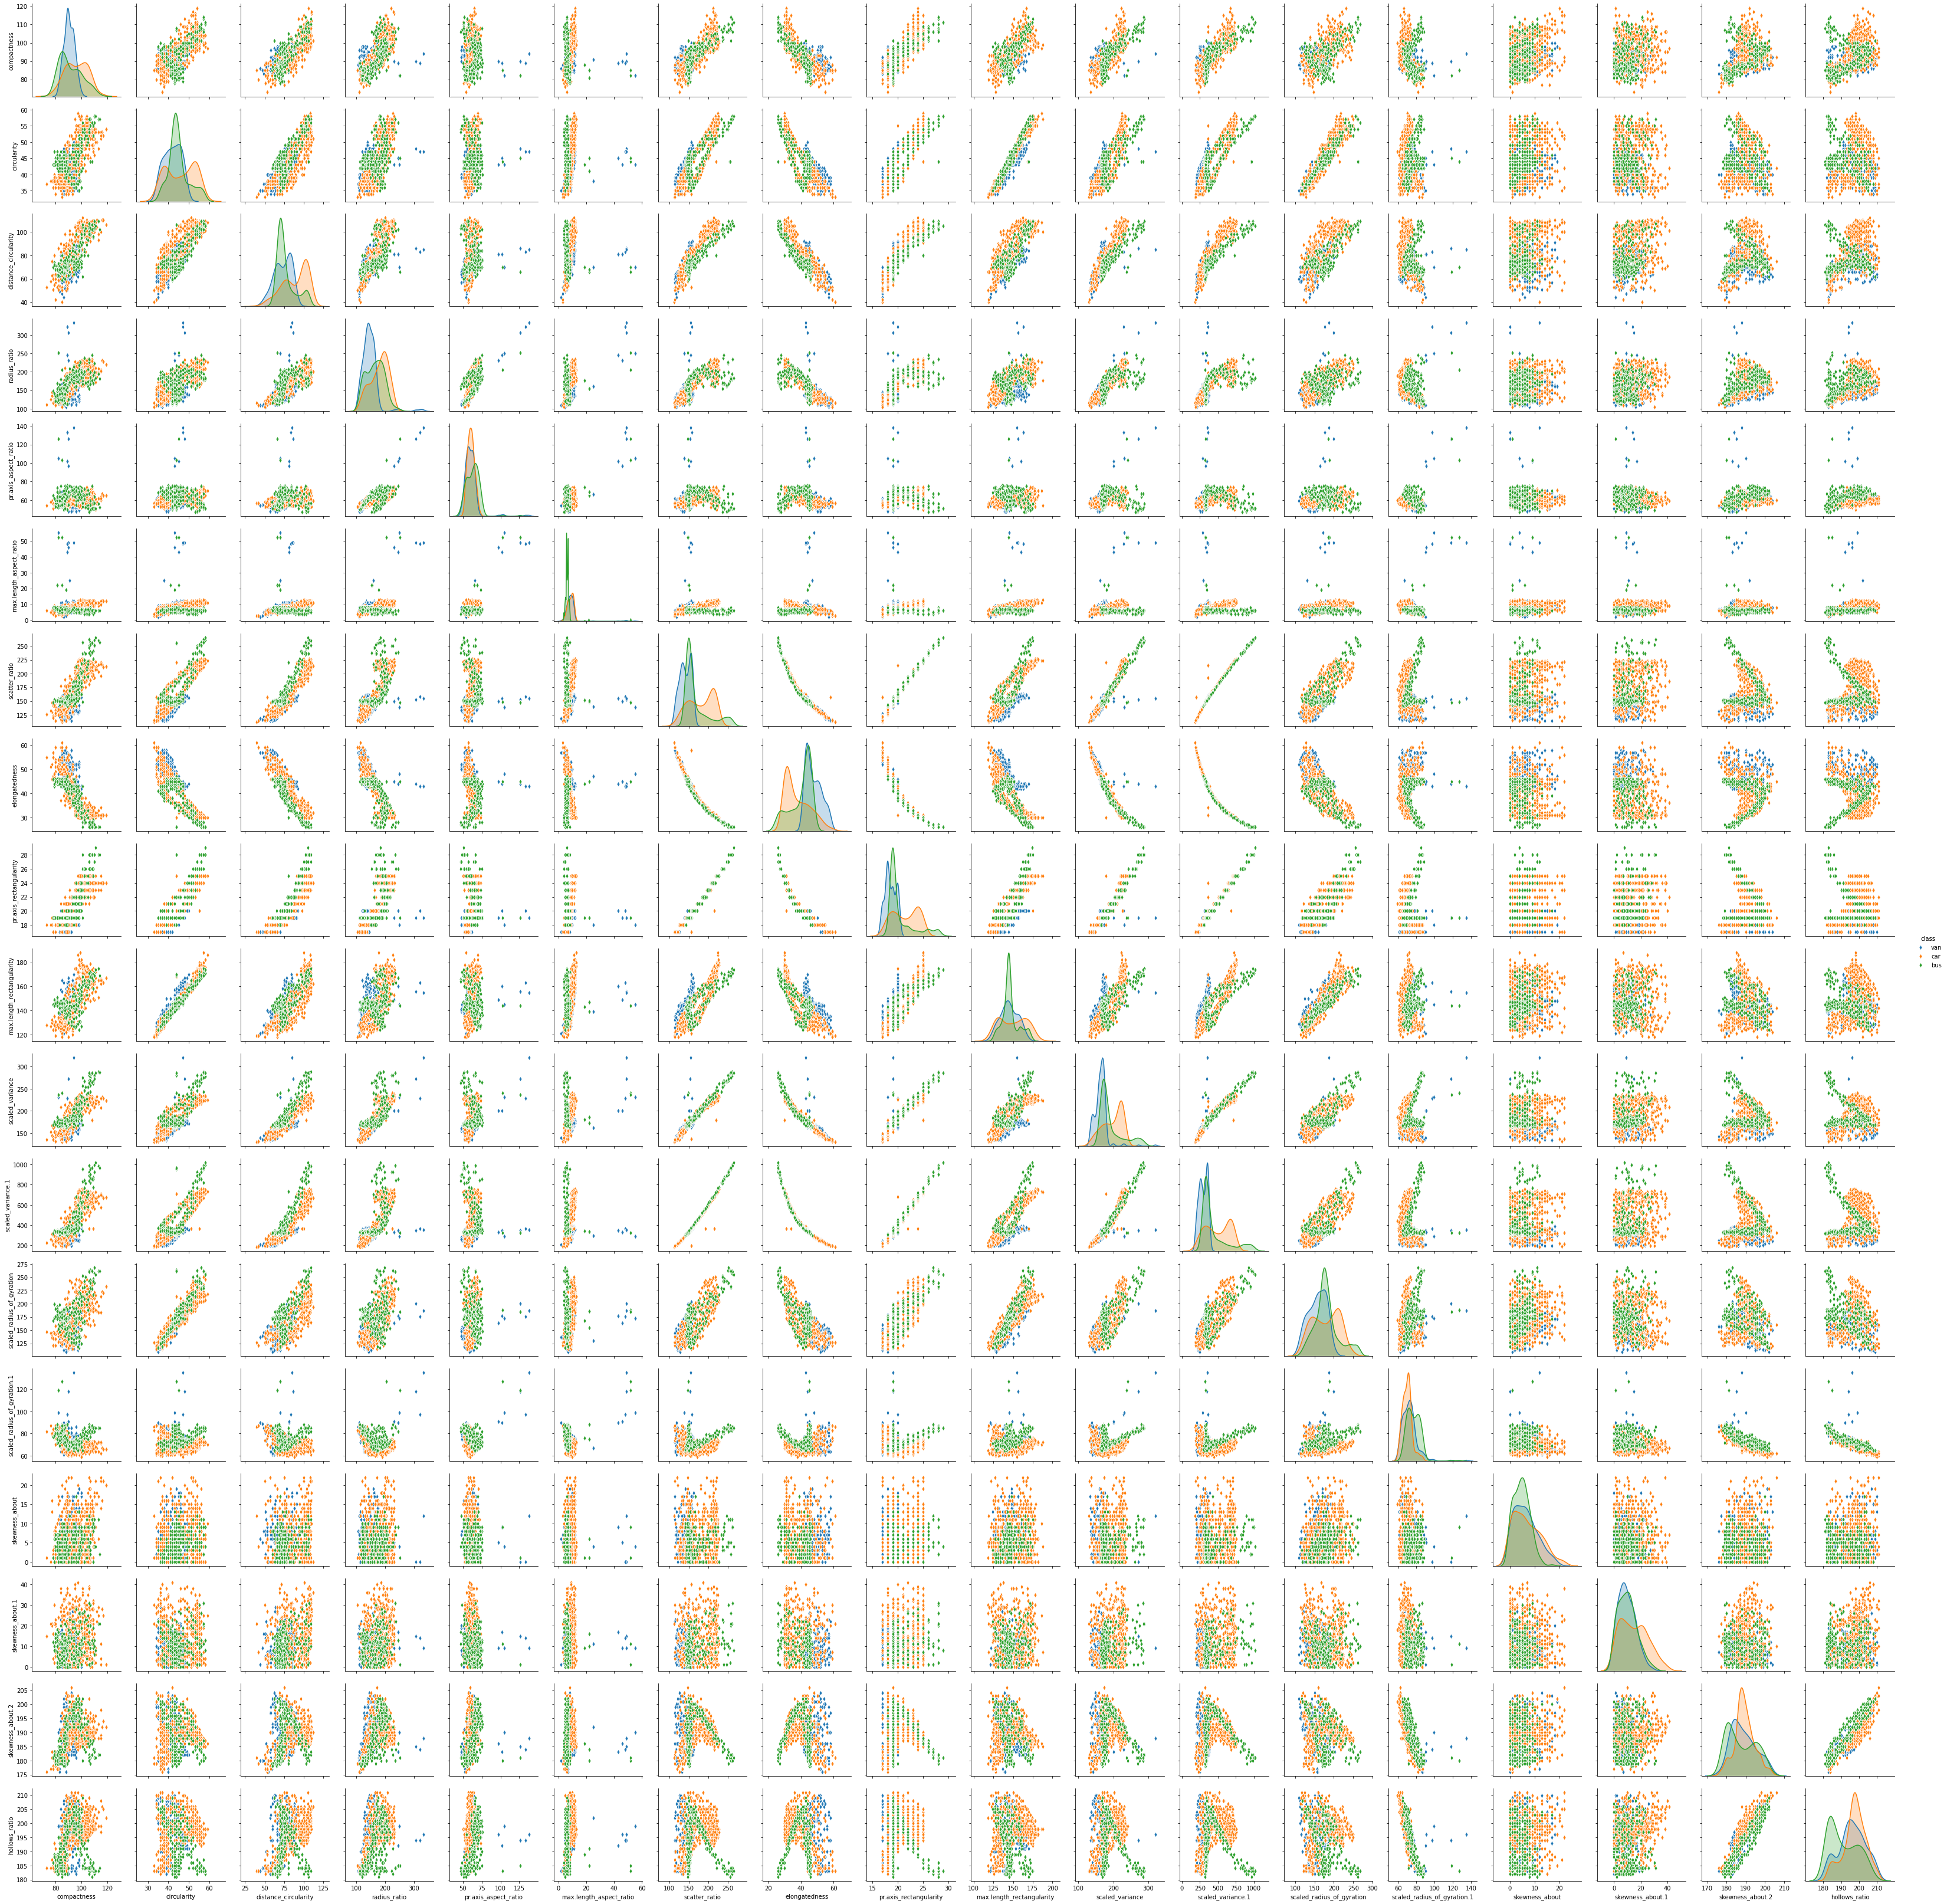

In [102]:
sns.pairplot(df,diag_kind='kde', hue='class', markers='d')
plt.show()

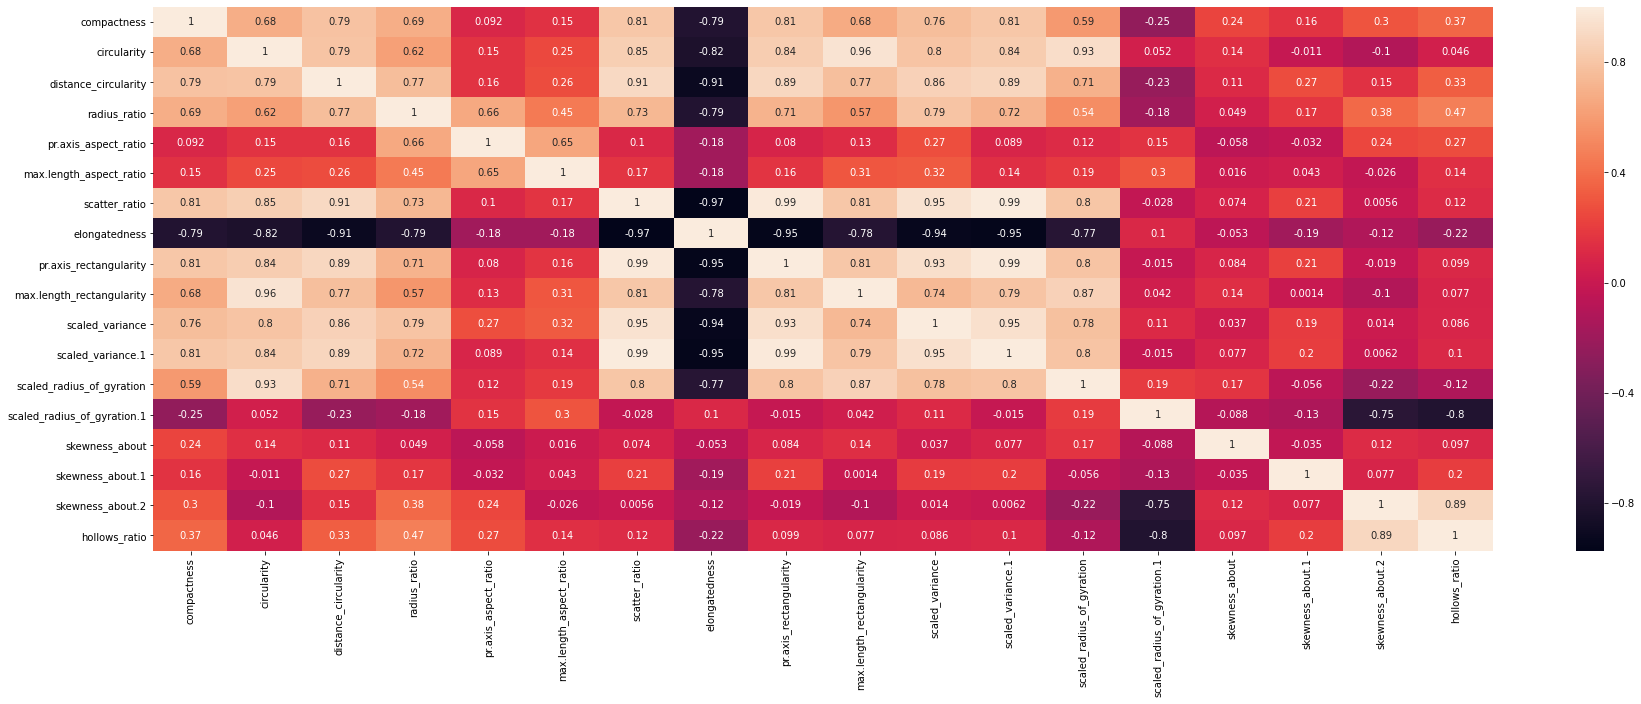

In [103]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

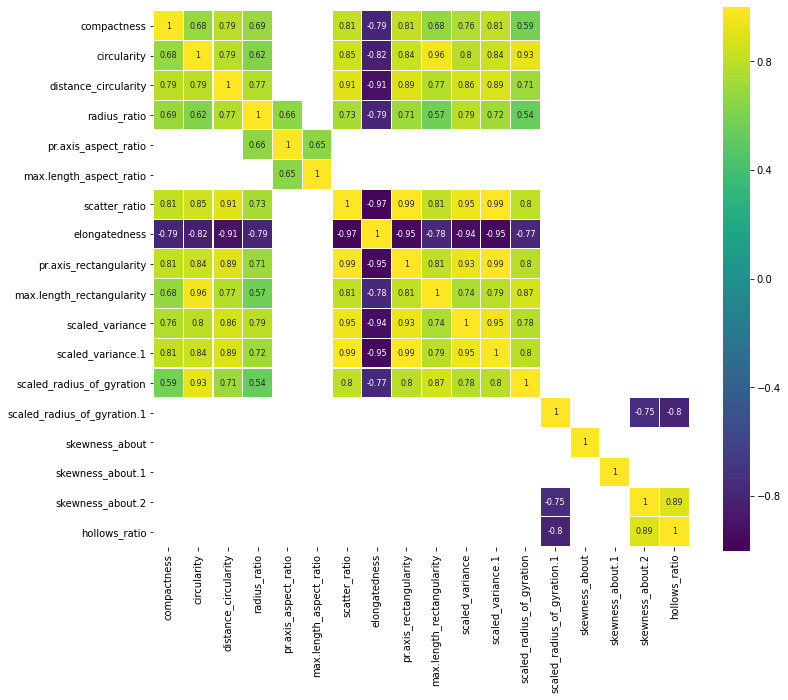

In [104]:
corr = df.drop('class', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- As we can see there is high co-relation between many features. 
- Majorly 8 Columns : max.length_rectangularity, scaled_radius_of_gyration, skewness_about.2, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1

In [46]:
df.replace({'car':0,'bus':1,'van':2},inplace=True)

In [105]:
df.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

### Now our data is ready for train-test split. (70:30)

In [48]:
X = df.drop(['class'],axis =1 )
y = df['class']
print('Shape of Independent Variable Set :\n\n',X.shape , '\n\nIndependent Variables:\n\n', X.columns)
print('\nShape of Target Variable Set :\n\n',y.shape, '\n\nTarget Variable:\n\n', y.name )
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 29)

Shape of Independent Variable Set :

 (846, 18) 

Independent Variables:

 Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

Shape of Target Variable Set :

 (846,) 

Target Variable:

 class


In [49]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n=============")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Confusion Matrix:\n=================\n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        print("Classification Report:\n======================\n",classification_report(y_train, pred))
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n============")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Confusion Matrix:\n===============\n {confusion_matrix(y_test, pred)}\n")
        print("Classification Report:\n======================\n",classification_report(y_test, pred))

In [50]:
from sklearn.svm import SVC

lsvm = SVC(kernel='linear')
lsvm.fit(X_train, y_train)

print_score(lsvm, X_train, y_train, X_test, y_test, train=True)
print_score(lsvm, X_train, y_train, X_test, y_test, train=False)


lsvm_accuracy=accuracy_score(y_test, lsvm.predict(X_test))

Train Result:
accuracy score: 0.9662

Confusion Matrix:
 [[288   5   3]
 [  7 147   0]
 [  5   0 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       296
           1       0.97      0.95      0.96       154
           2       0.98      0.96      0.97       142

    accuracy                           0.97       592
   macro avg       0.97      0.96      0.97       592
weighted avg       0.97      0.97      0.97       592

Test Result:
accuracy score: 0.9645669291338582

Confusion Matrix:
 [[128   5   0]
 [  0  64   0]
 [  3   1  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.91      1.00      0.96        64
           2       1.00      0.93      0.96        57

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.97   

In [106]:
from sklearn.svm import SVC

rsvm = SVC(kernel='rbf', gamma = 1)
rsvm.fit(X_train, y_train)

print_score(rsvm, X_train, y_train, X_test, y_test, train=True)
print_score(rsvm, X_train, y_train, X_test, y_test, train=False)


rsvm_accuracy=accuracy_score(y_test, rsvm.predict(X_test))

Train Result:
accuracy score: 0.9696

Confusion Matrix:
 [[289   2   5]
 [  0 153   1]
 [ 10   0 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       296
           1       0.99      0.99      0.99       154
           2       0.96      0.93      0.94       142

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592

Test Result:
accuracy score: 0.9566929133858267

Confusion Matrix:
 [[130   1   2]
 [  2  61   1]
 [  5   0  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       133
           1       0.98      0.95      0.97        64
           2       0.95      0.91      0.93        57

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96   

- Radial Support Vector classification is doing a better job on train set which is only slightly better.
- Linear is giving better results for test set.
- We will scale our data and observe.

In [110]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=29)

In [111]:
lsvm = SVC(kernel='linear')
lsvm.fit(X_train, y_train)

print_score(lsvm, X_train, y_train, X_test, y_test, train=True)
print_score(lsvm, X_train, y_train, X_test, y_test, train=False)

lsvm_accuracy=accuracy_score(y_test, lsvm.predict(X_test))
lsvm_y_predict = lsvm.predict(X_test)

Train Result:
accuracy score: 0.9020

Confusion Matrix:
 [[265  19  12]
 [ 16 136   2]
 [  8   1 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       296
           1       0.87      0.88      0.88       154
           2       0.90      0.94      0.92       142

    accuracy                           0.90       592
   macro avg       0.90      0.91      0.90       592
weighted avg       0.90      0.90      0.90       592

Test Result:
accuracy score: 0.9212598425196851

Confusion Matrix:
 [[121   8   4]
 [  3  60   1]
 [  3   1  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       133
           1       0.87      0.94      0.90        64
           2       0.91      0.93      0.92        57

    accuracy                           0.92       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.92   

In [115]:
from sklearn.svm import SVC

rsvm = SVC(kernel='rbf', gamma = 1)
rsvm.fit(X_train, y_train)

print_score(rsvm, X_train, y_train, X_test, y_test, train=True)
print_score(rsvm, X_train, y_train, X_test, y_test, train=False)

rsvm_accuracy=accuracy_score(y_test, rsvm.predict(X_test))
rsvm_y_predict = rsvm.predict(X_test)

Train Result:
accuracy score: 0.9696

Confusion Matrix:
 [[289   2   5]
 [  0 153   1]
 [ 10   0 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       296
           1       0.99      0.99      0.99       154
           2       0.96      0.93      0.94       142

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592

Test Result:
accuracy score: 0.9566929133858267

Confusion Matrix:
 [[130   1   2]
 [  2  61   1]
 [  5   0  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       133
           1       0.98      0.95      0.97        64
           2       0.95      0.91      0.93        57

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96   

#### After scaling data linear SVM model performance decreased.

In [116]:
X_scaled = X.apply(zscore)
cov_matrix = np.cov(X_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.72271419  0.19224468  0.49696111
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77083809  0.80940332
   0.58593517 -0.24882535  0.19888164  0.15662174  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63912175  0.20356524  0.55995521
   0.8489411  -0.82244387  0.84439802  0.96245572  0.8038924   0.8308338
   0.92691166  0.06825335  0.13695576 -0.00977645 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79519797  0.24429649  0.66474465
   0.90614687 -0.9123854   0.89408198  0.77544391  0.8707286   0.88671192
   0.70660663 -0.2315073   0.09978182  0.26291711  0.14627113  0.33312625]
 [ 0.72271419  0.63912175  0.79519797  1.00118343  0.65282528  0.4669588
   0.77076945 -0.82630723  0.74492213  0.58029808  0.78742045  0.76164607
   0.55150954 -0.39028699  0.03632927  0.17993667  0.40622105  0.49231448]
 [ 0.19224468  0.20356524  0.24429649  0.65282528  1.00118343  0.

In [117]:
pca = PCA(n_components=18)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([5.41120230e-01, 1.86105712e-01, 6.61881013e-02, 6.29132931e-02,
       4.91457175e-02, 3.70996468e-02, 1.76718697e-02, 1.25810998e-02,
       7.05666120e-03, 4.40562914e-03, 4.12694566e-03, 3.54150479e-03,
       2.19989218e-03, 1.75789069e-03, 1.55740794e-03, 1.16426972e-03,
       1.08530966e-03, 2.78819227e-04])

In [118]:
pca.explained_variance_

array([9.75169096e+00, 3.35386720e+00, 1.19279575e+00, 1.13377944e+00,
       8.85669805e-01, 6.68583930e-01, 3.18470096e-01, 2.26727797e-01,
       1.27170221e-01, 7.93951722e-02, 7.43729331e-02, 6.38225265e-02,
       3.96449208e-02, 3.16794786e-02, 2.80665184e-02, 2.09816559e-02,
       1.95586928e-02, 5.02468542e-03])

In [119]:
pca.components_

array([[ 2.72444770e-01,  2.87251586e-01,  3.02353445e-01,
         2.69734976e-01,  9.77737637e-02,  1.94554405e-01,
         3.10498222e-01, -3.08953143e-01,  3.07264556e-01,
         2.78145499e-01,  2.99876023e-01,  3.06049739e-01,
         2.63272261e-01, -4.21887929e-02,  3.62648561e-02,
         5.86992756e-02,  3.78918802e-02,  8.45947958e-02],
       [-8.71563862e-02,  1.31333728e-01, -4.63775507e-02,
        -1.97875352e-01, -2.57575467e-01, -1.07778732e-01,
         7.50806651e-02, -1.30172095e-02,  8.73563412e-02,
         1.21848584e-01,  7.71607966e-02,  7.26747278e-02,
         2.10329928e-01,  5.04150658e-01, -1.64546723e-02,
        -9.28528716e-02, -5.01474786e-01, -5.07535422e-01],
       [-3.71501785e-02, -2.01632439e-01,  6.41801223e-02,
         5.47090390e-02, -6.53632901e-02, -1.48962359e-01,
         1.09458210e-01, -9.09599014e-02,  1.06622130e-01,
        -2.13986712e-01,  1.43874617e-01,  1.10764049e-01,
        -2.03477222e-01,  7.31936468e-02, -5.56099559e

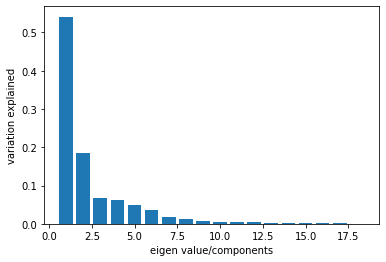

In [120]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

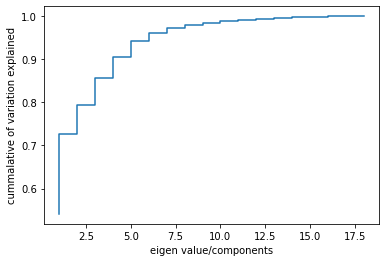

In [121]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

- From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components.
- Before applying pca with 8 dimension which are explaining more than 95% variation of data we will make model with 18 dimension data too and then we will compare both models.

In [122]:
pca_8c = PCA(n_components=8)
pca_8c.fit(X_scaled)
X_scaled_pca_8c = pca_8c.transform(X_scaled)
pca_18c = PCA(n_components=18)
pca_18c.fit(X_scaled)
X_scaled_pca_18c = pca_18c.transform(X_scaled)

In [125]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled_pca_18c, y, test_size=0.3, random_state=29)
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_scaled_pca_8c, y, test_size=0.3, random_state=29)

In [126]:
X_scaled_pca_18c.shape

(846, 18)

In [127]:
svm = SVC()
svm.fit(X_scaled_train, y_scaled_train)

print_score(svm, X_scaled_train, y_scaled_train, X_scaled_test, y_scaled_test, train=True)
print_score(svm, X_scaled_train, y_scaled_train, X_scaled_test, y_scaled_test, train=False)

svm_accuracy=accuracy_score(y_scaled_test, svm.predict(X_scaled_test))
y_scaled_predict = svm.predict(X_scaled_test)

Train Result:
accuracy score: 0.9730

Confusion Matrix:
 [[290   1   5]
 [  0 153   1]
 [  9   0 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       296
           1       0.99      0.99      0.99       154
           2       0.96      0.94      0.95       142

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592

Test Result:
accuracy score: 0.9566929133858267

Confusion Matrix:
 [[130   1   2]
 [  1  62   1]
 [  5   1  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       133
           1       0.97      0.97      0.97        64
           2       0.94      0.89      0.92        57

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96   

In [128]:
X_scaled_pca_8c.shape

(846, 8)

In [129]:
svm = SVC()
svm.fit(pca_X_train, pca_y_train)

print_score(svm, pca_X_train, pca_y_train, pca_X_test, pca_y_test, train=True)
print_score(svm, pca_X_train, pca_y_train, pca_X_test, pca_y_test, train=False)

svm_accuracy=accuracy_score(pca_y_test, svm.predict(pca_X_test))
pca_y_predict = svm.predict(pca_X_test)

Train Result:
accuracy score: 0.9561

Confusion Matrix:
 [[287   3   6]
 [  3 151   0]
 [ 11   3 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       296
           1       0.96      0.98      0.97       154
           2       0.96      0.90      0.93       142

    accuracy                           0.96       592
   macro avg       0.96      0.95      0.95       592
weighted avg       0.96      0.96      0.96       592

Test Result:
accuracy score: 0.937007874015748

Confusion Matrix:
 [[130   1   2]
 [  2  61   1]
 [  8   2  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       133
           1       0.95      0.95      0.95        64
           2       0.94      0.82      0.88        57

    accuracy                           0.94       254
   macro avg       0.94      0.92      0.93       254
weighted avg       0.94    

In [66]:
print("Accuracy score with Linear SVM data(18 dimension)",accuracy_score(y_test,lsvm_y_predict))
print("Accuracy score with Radial SVM data(18 dimension)",accuracy_score(y_test,rsvm_y_predict))
print("Accuracy score with pca data(18 dimension)",accuracy_score(y_scaled_test,y_scaled_predict))
print("Accuracy score with pca data(8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Accuracy score with Linear SVM data(18 dimension) 0.9212598425196851
Accuracy score with Radial SVM data(18 dimension) 0.9566929133858267
Accuracy score with pca data(18 dimension) 0.9566929133858267
Accuracy score with pca data(8 dimension) 0.937007874015748


## Conclusion :

- From above we can see that pca is doing a very good job.Accuracy with pca is approx 93% and with raw data approx
- 95% but note that pca 93% accuracy is with only 8 dimension where as rawdata has 18 dimension.
- But there are disadvantages of PCA that we cannot interpret the model as it's a blackbox technique.